# Intro to stats in python

### For a tutorial on these stats visit:
https://scipy-lectures.org/packages/statistics/index.html

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas.plotting as pd_plotting
import scipy
from scipy import stats
import seaborn
import statsmodels.api as sm
from statsmodels.formula.api import ols
import os
import urllib

## Import .csv file

In [2]:
data = pd.read_csv("brain_size.csv", sep=';' , na_values = ".")
print(data)
data1 = pd.read_csv("iris.csv", sep=',' , na_values = ".")

    Unnamed: 0  Gender  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count
0            1  Female   133  132  124   118.0    64.5     816932
1            2    Male   140  150  124     NaN    72.5    1001121
2            3    Male   139  123  150   143.0    73.3    1038437
3            4    Male   133  129  128   172.0    68.8     965353
4            5  Female   137  132  134   147.0    65.0     951545
5            6  Female    99   90  110   146.0    69.0     928799
6            7  Female   138  136  131   138.0    64.5     991305
7            8  Female    92   90   98   175.0    66.0     854258
8            9    Male    89   93   84   134.0    66.3     904858
9           10    Male   133  114  147   172.0    68.8     955466
10          11  Female   132  129  124   118.0    64.5     833868
11          12    Male   141  150  128   151.0    70.0    1079549
12          13    Male   135  129  124   155.0    69.0     924059
13          14  Female   140  120  147   155.0    70.5     856472
14        

### Numpy Array

In [3]:
t = np.linspace(-6, 6,20)
sin_t = np.sin(t)
cos_t = np.cos(t)

### Numpy Array Exposed in Pandas

In [4]:
pd.DataFrame({'t': t, 'sin': sin_t, "cos" : cos_t})

,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509
4,-3.473684,0.326021,-0.945363
5,-2.842105,-0.295030,-0.955488
6,-2.210526,-0.802257,-0.596979
7,-1.578947,-0.999967,-0.008151
8,-0.947368,-0.811882,0.583822
9,-0.315789,-0.310567,0.950551


## Manuipulating data

#### It has 40 rows and 8 columns

In [62]:
data.shape

(40, 8)

In [6]:
data.columns 
data.columns = pd.Index([u'Unnamed: 0', u'Gender', u'FSIQ', u'VIQ', u'PIQ', u'Weight', u'Height', u'MRI_Count'], dtype='object')
print(data.columns)

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')


#### Columns can be shown by name

In [63]:
>>> print(data['Gender'])

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object


# Simpler selector

In [8]:
>>> data[data['Gender'] == 'Female'] ['VIQ'].mean()

109.45

In [9]:
>>> groupby_gender = data.groupby('Gender')
>>> for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


In [10]:
>>> groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


## Making Box and Whisker Plots

<Axes: >

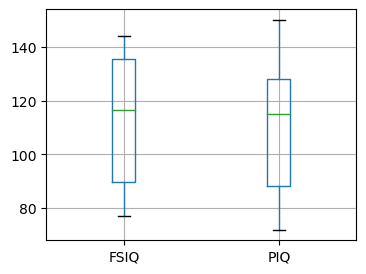

In [65]:
plt.figure(figsize=(4, 3))
data.boxplot(column= ['FSIQ', 'PIQ'])

#### Boxplotting differences

In [ ]:
plt.figure(figsize=(4, 3))
plt.boxplot(data['FSIQ'] - data['PIQ'])
plt.xticks((1, ), ('FSIQ-PIQ',))
plt.show()

# Plotting data

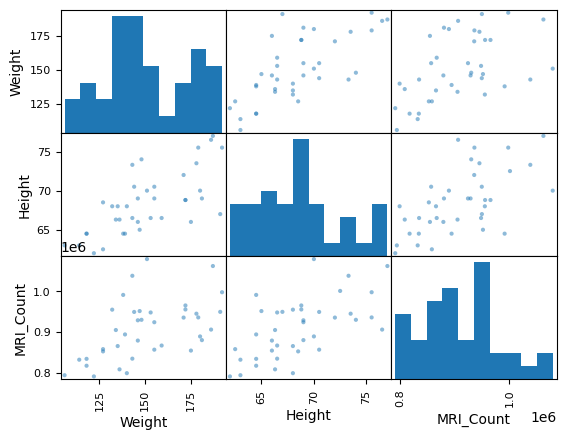

In [11]:
>>> pd.plotting.scatter_matrix(data[['Weight','Height', 'MRI_Count']])
plt.show()

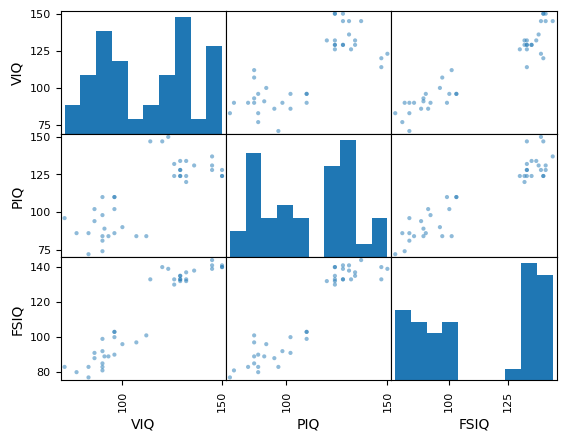

In [12]:
>>> pd.plotting.scatter_matrix(data[['VIQ','PIQ', 'FSIQ']])
plt.show()

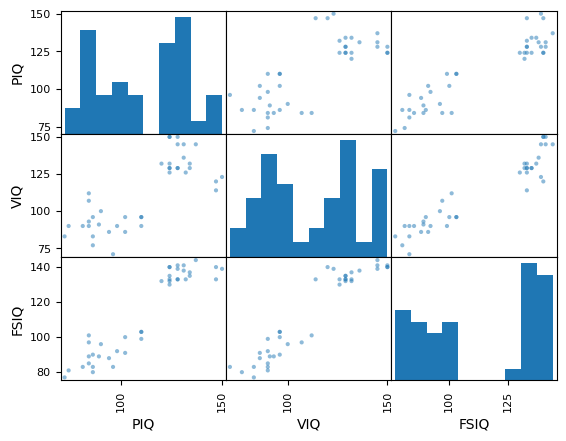

In [13]:
pd.plotting.scatter_matrix(data[['PIQ','VIQ','FSIQ']])
plt.show()

# Hypothesis Testing and Comparing Two Groups

In [14]:
>>> stats.ttest_1samp(data['VIQ'], 0)

TtestResult(statistic=30.08809997084933, pvalue=1.3289196468727879e-28, df=39)

In [15]:
>>> female_viq = data[data['Gender'] == 'Female']['VIQ']
>>> male_viq = data[data['Gender'] == 'Male']['VIQ']
>>> stats.ttest_ind(female_viq, male_viq)

TtestResult(statistic=-0.7726161723275012, pvalue=0.44452876778583217, df=38.0)

In [16]:
>>> stats.ttest_ind(data['FSIQ'], data['PIQ'])

TtestResult(statistic=0.465637596380964, pvalue=0.6427725009414841, df=78.0)

In [17]:
>>> stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)

TtestResult(statistic=1.7842019405859857, pvalue=0.08217263818364236, df=39)

## Wilcoxon signed-rank test

In [18]:
>>> stats.wilcoxon(data['FSIQ'], data ['PIQ'])

/srv/conda/envs/notebook/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

## Linear Models

#### Generate simulated data according to the model

In [19]:
>>> x = np.linspace(-5, 5, 20)
>>> np.random.seed(1)
>>> # normal distributed noise
>>> y = -5 +3*x +4 * np.random.normal (size=x.shape)
>>> # Create a data frame conatining all relavent variables
>>> data = pd.DataFrame({'x' : x, 'y': y})

##### Specify OLS model and fit it to the graph

In [20]:
>>> from statsmodels.formula.api import ols
>>> model = ols("y ~ x", data).fit()

##### Inspect Stats derived from the OLS model

In [21]:
>>> from statsmodels.formula.api import ols
>>> model = ols("y ~ x", data).fit()
>>> print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           8.56e-08
Time:                        17:22:29   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

### Ex. Copmarison of male and female IQ based on brain size

In [22]:
## rerun data definitions to make work
>>> import pandas as pd
>>> data = pd.read_csv ("brain_size.csv",sep=';',na_values='.')
>>> data.columns 
>>> data.columns = pd.Index([u'Unnamed: 0', u'Gender', u'FSIQ', u'VIQ', u'PIQ', u'Weight', u'Height', u'MRI_Count'], dtype='object')
>>> model = ols("VIQ ~ Gender", data).fit()
>>> print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Thu, 20 Jul 2023   Prob (F-statistic):              0.445
Time:                        17:22:30   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

### Link to t-tests between different FSIQ and PIQ

In [23]:
data_fisq = pd.DataFrame({'iq': data['FSIQ'], 'type': 'fsiq'})
data_piq = pd.DataFrame({'iq': data['PIQ'], 'type': 'piq'})
data_long = pd.concat((data_fisq, data_piq))
print(data_long)

     iq  type
0   133  fsiq
1   140  fsiq
2   139  fsiq
3   133  fsiq
4   137  fsiq
..  ...   ...
35  128   piq
36  124   piq
37   94   piq
38   74   piq
39   89   piq

[80 rows x 2 columns]


In [24]:
[34,35,]
model = ols ("iq ~ type", data_long).fit()
print(model.summary())
stats.ttest_ind(data['FSIQ'], data['PIQ'])

                            OLS Regression Results                            
Dep. Variable:                     iq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2168
Date:                Thu, 20 Jul 2023   Prob (F-statistic):              0.643
Time:                        17:22:31   Log-Likelihood:                -364.35
No. Observations:                  80   AIC:                             732.7
Df Residuals:                      78   BIC:                             737.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     113.4500      3.683     30.807      

TtestResult(statistic=0.465637596380964, pvalue=0.6427725009414841, df=78.0)

## Multiple Regression

## Opening iris.csv from import

In [25]:
print(data1)
data1.shape #150 rows and 1? column
data1.columns = pd.Index([u'sepal_length', u'sepal_width', u'petal_length', u'petal_width', u'name'], dtype='object')
print(data1.shape)
print(data1.columns)

     sepal_length  sepal_width  petal_length  petal_width       name
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]
(150, 5)
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'name'], dtype='object')


In [26]:
model = ols('sepal_width ~ petal_length', data1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     31.79
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           8.43e-08
Time:                        17:22:32   Log-Likelihood:                -72.397
No. Observations:                 150   AIC:                             148.8
Df Residuals:                     148   BIC:                             154.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.4424      0.076     45.264   

# ANOVA
### Post-hoc hypothesis testing: analysis of varience

##### Write a vector of contrast

In [27]:
test_input = [0, 1, -1, 0]
test_input_array = sm.add_constant(test_input)
result = model.f_test(test_input_array)
print (result)

<F test: F=4505.625379305181, p=2.6407707632383954e-133, df_denom=148, df_num=2>


/srv/conda/envs/notebook/lib/python3.11/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  warnings.warn('covariance of constraints does not have full '


# More Visualization Using Seaborn

### Importing "wages.txt" from the web

In [33]:
engine ='python'
if not os.path.exists('wages.txt'):
    urllib.request.urlretrieve('http://lib.stat.cmu.edu/datasets/CPS_85_Wages', 'wages.txt')
names = ['EDUCATION: Number of years of education','SOUTH: 1=Person lives in South, 0=Person lives elsewhere','SEX: 1=Female, 0=Male','EXPERIENCE: Number of years of work experience','UNION: 1=Union member, 0=Not union member','WAGE: Wage (dollars per hour)','AGE: years','RACE: 1=Other, 2=Hispanic, 3=White','OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other','SECTOR: 0=Other, 1=Manufacturing, 2=Construction','MARR: 0=Unmarried,  1=Married']
short_names = [n.split(':')[0] for n in names]
data3 = pd.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None, header=None, names=short_names)
data3.columns =short_names

/tmp/ipykernel_142/1728795383.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data3 = pd.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None, header=None, names=short_names)


### mulplicative factors

In [34]:
data3['WAGE'] = np.log10(data3['WAGE'])

/srv/conda/envs/notebook/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/srv/conda/envs/notebook/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/srv/conda/envs/notebook/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/srv/conda/envs/notebook/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Effect of union: 1=Union member, 0=Not union member')

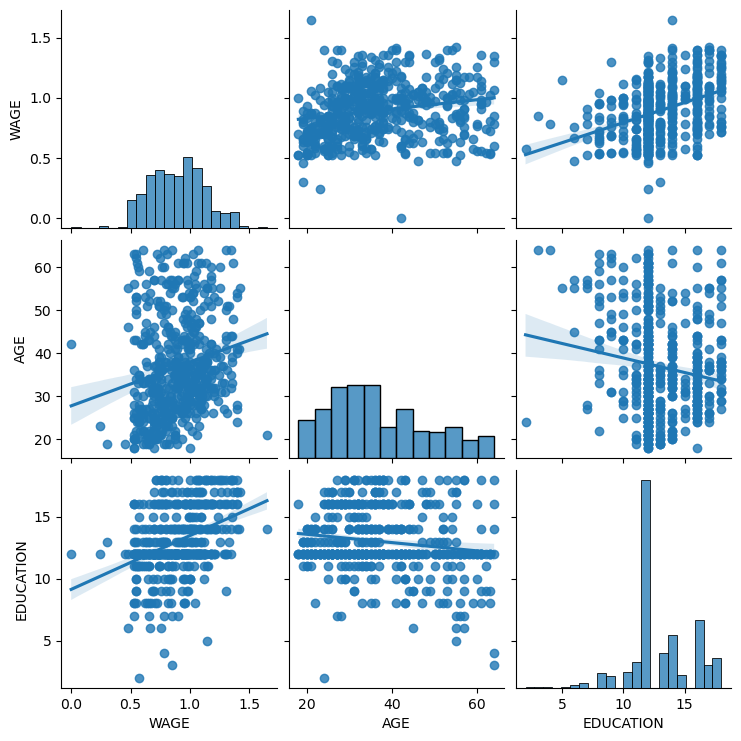

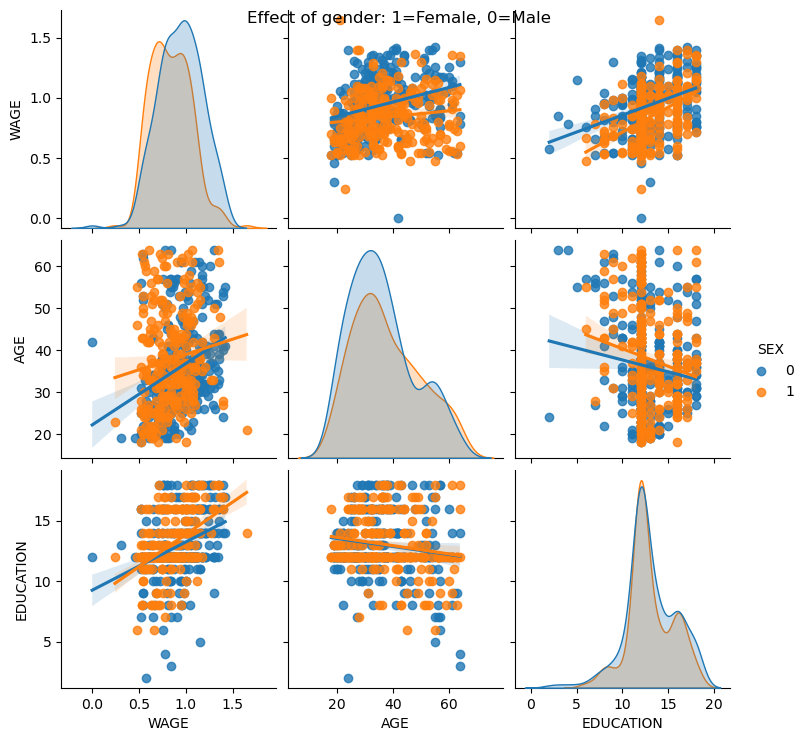

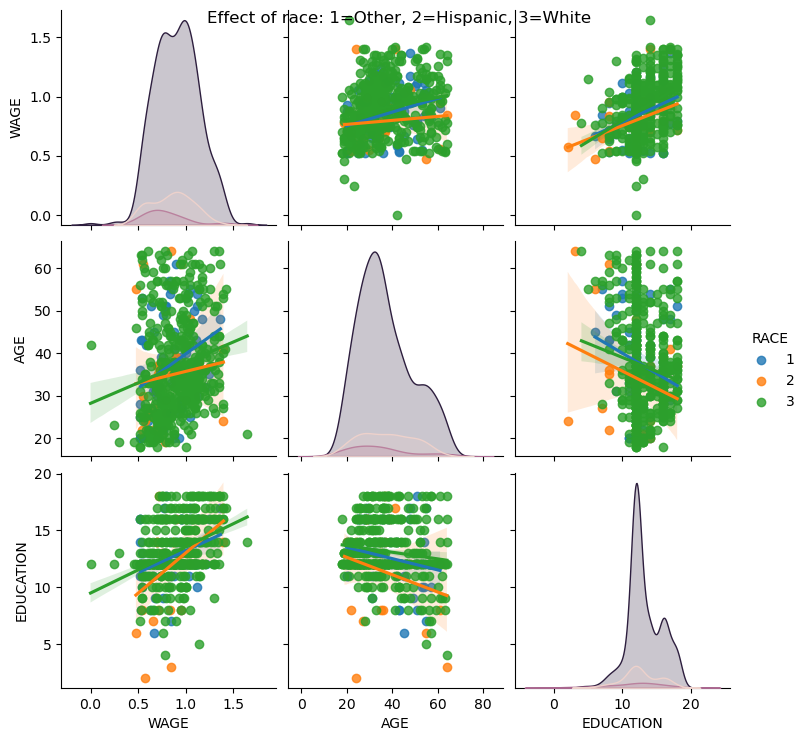

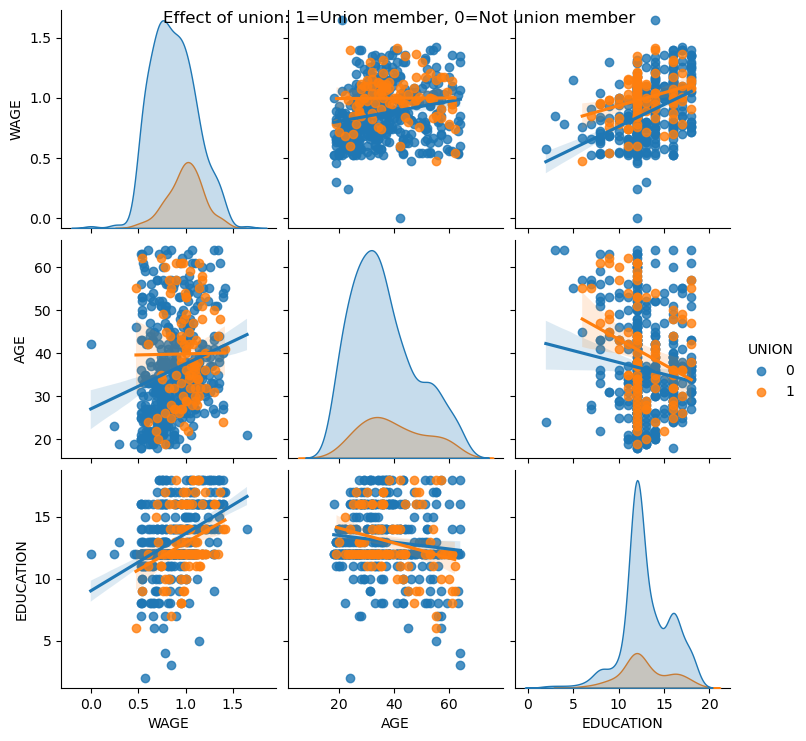

In [35]:
seaborn.pairplot(data3, vars=['WAGE', 'AGE', 'EDUCATION'], kind='reg')
seaborn.pairplot(data3, vars=['WAGE', 'AGE', 'EDUCATION'], kind='reg', hue='SEX')
plt.suptitle('Effect of gender: 1=Female, 0=Male')
seaborn.pairplot(data3, vars=['WAGE','AGE','EDUCATION'], kind='reg', hue='RACE')
plt.suptitle('Effect of race: 1=Other, 2=Hispanic, 3=White')
seaborn.pairplot(data3, vars=['WAGE','AGE', 'EDUCATION'], kind='reg', hue='UNION')
plt.suptitle('Effect of union: 1=Union member, 0=Not union member')

### Plotting a simple regression

/srv/conda/envs/notebook/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


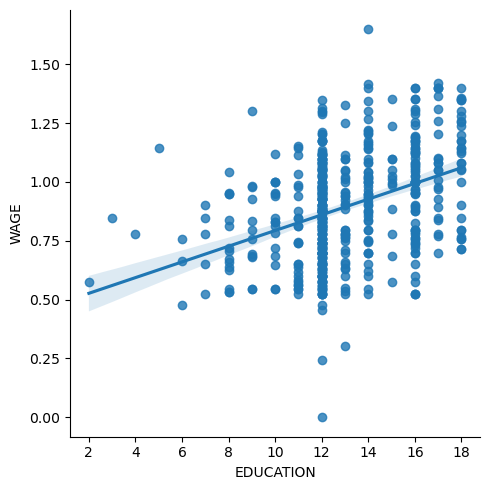

In [38]:
seaborn.lmplot(y='WAGE', x='EDUCATION', data=data3)
plt.show()

## Viewing wages.txt

In [39]:
print(data3)

     EDUCATION  SOUTH  SEX  EXPERIENCE  UNION      WAGE  AGE  RACE  \
0            8      0    1          21      0  0.707570   35     2   
1            9      0    1          42      0  0.694605   57     3   
2           12      0    0           1      0  0.824126   19     3   
3           12      0    0           4      0  0.602060   22     3   
4           12      0    0          17      0  0.875061   35     3   
..         ...    ...  ...         ...    ...       ...  ...   ...   
529         18      0    0           5      0  1.055378   29     3   
530         12      0    1          33      0  0.785330   51     1   
531         17      0    1          25      1  1.366423   48     1   
532         12      1    0          13      1  1.298416   31     3   
533         16      0    0          33      0  1.186956   55     3   

     OCCUPATION  SECTOR  MARR  
0             6       1     1  
1             6       1     1  
2             6       1     0  
3             6       0     0  

/srv/conda/envs/notebook/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


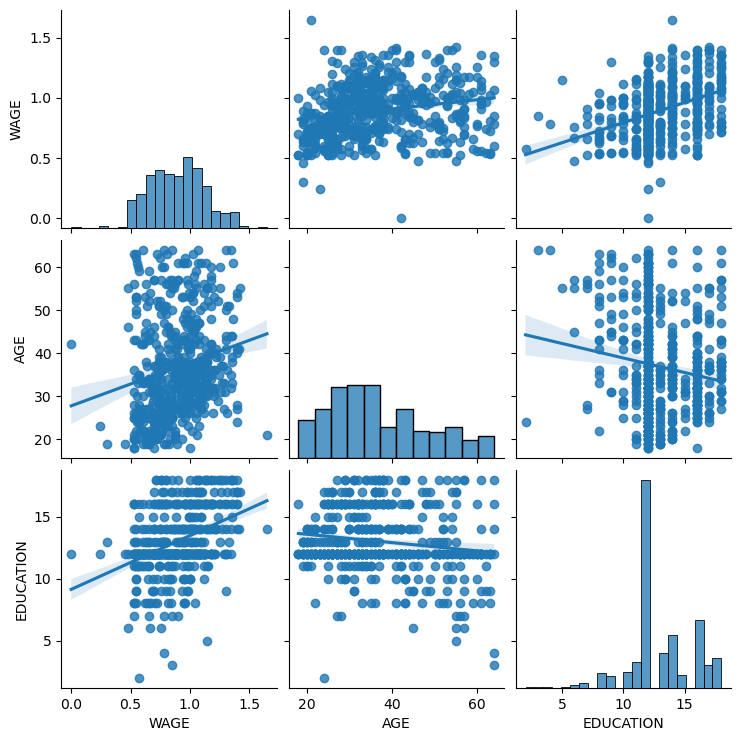

In [42]:
seaborn.pairplot(data3, vars=['WAGE', 'AGE', 'EDUCATION'], kind='reg')

/srv/conda/envs/notebook/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


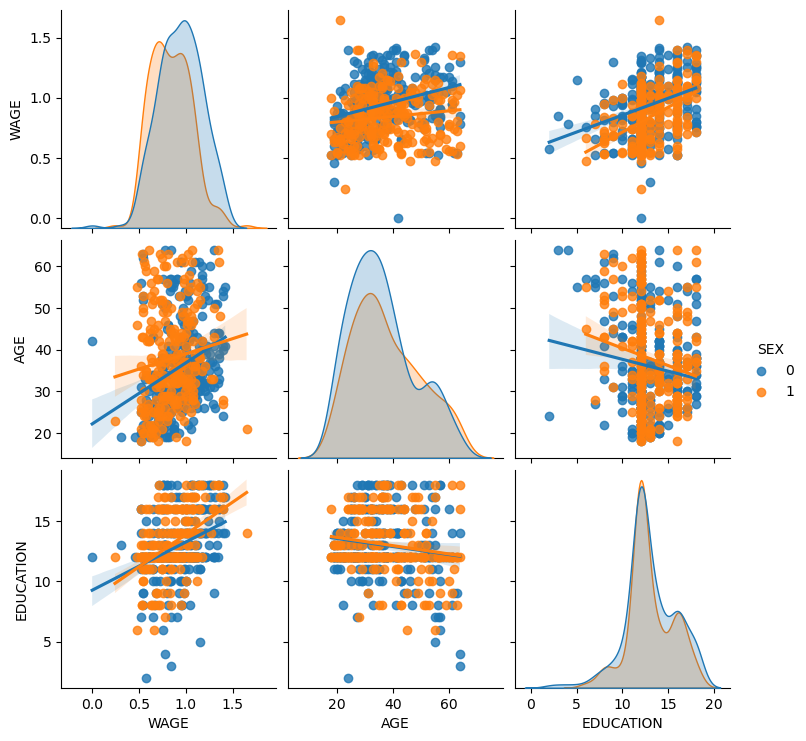

In [43]:
seaborn.pairplot(data3, vars=['WAGE', 'AGE', 'EDUCATION'], kind='reg', hue='SEX')

## lmplot for plotting a univariate regression

/srv/conda/envs/notebook/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


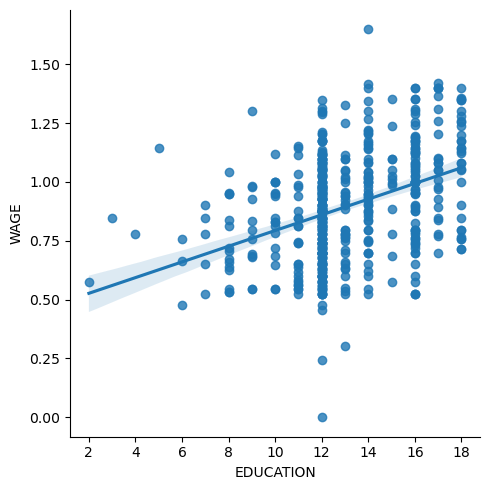

In [44]:
seaborn.lmplot(y='WAGE', x='EDUCATION', data=data3)

### Correlation testing

In [49]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
result = ols(formula='WAGE ~ EDUCATION + GENDER - EDUCATION * GENDER', data=data3).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 20 Jul 2023   Prob (F-statistic):                nan
Time:                        17:31:55   Log-Likelihood:                 29.465
No. Observations:                 534   AIC:                            -56.93
Df Residuals:                     533   BIC:                            -52.65
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8943      0.010     90.166      0.0

In [57]:
engine='python'

/tmp/ipykernel_142/3755915164.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data3 = pd.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None, header=None, names=short_names)


Index(['EDUCATION', 'SOUTH', 'SEX', 'EXPERIENCE', 'UNION', 'WAGE', 'AGE',
       'RACE', 'OCCUPATION', 'SECTOR', 'MARR'],
      dtype='object')


/srv/conda/envs/notebook/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


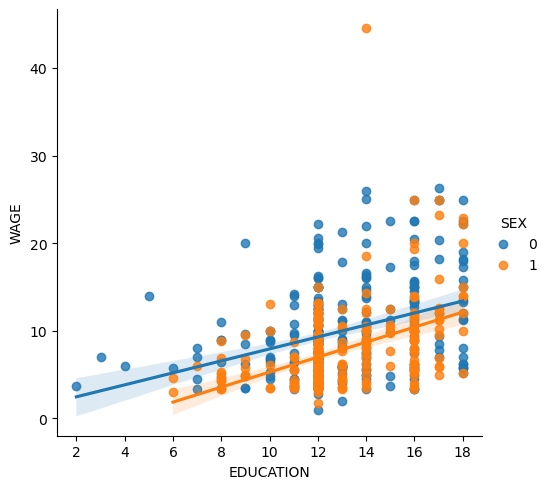

In [60]:
if not os.path.exists('wages.txt'):
    urllib.request.urlretrieve('http://lib.stat.cmu.edu/datasets/CPS_85_Wages', 'wages.txt')
names = ['EDUCATION: Number of years of education','SOUTH: 1=Person lives in South, 0=Person lives elsewhere','SEX: 1=Female, 0=Male','EXPERIENCE: Number of years of work experience','UNION: 1=Union member, 0=Not union member','WAGE: Wage (dollars per hour)','AGE: years','RACE: 1=Other, 2=Hispanic, 3=White','OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other','SECTOR: 0=Other, 1=Manufacturing, 2=Construction','MARR: 0=Unmarried,  1=Married']
short_names = [n.split(':')[0] for n in names]
data3 = pd.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None, header=None, names=short_names)
data3.columns =short_names
print(data3.columns)
seaborn.lmplot(y='WAGE', x='EDUCATION', hue='SEX', data=data3)
plt.show()